In [39]:
# Do run this in the start to check whether GPU is running or not.
# Go to Runtime tab, change runtime to T4 GPU.

import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPU devices:", gpus)

if gpus:
    print("GPU is available!")
else:
    print("GPU not detected. Running on CPU.")
    !rm -rf /content/alz_split
print("Deleted old split directory!")


TensorFlow version: 2.16.2
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available!
Deleted old split directory!


In [40]:
pip install tensorflow-macos tensorflow-metal


26927.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [41]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print("GPU devices:", gpus)

if gpus:
    print("GPU (Metal) is available!")
else:
    print("GPU not detected. Running on CPU.")


GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU (Metal) is available!


In [42]:
# This will make TF run operations on Metal GPU
physical_gpus = tf.config.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [43]:
import torch
print("MPS available:", torch.backends.mps.is_available())


MPS available: True


In [44]:
device = torch.device("mps")


In [45]:
import torch

print("MPS built:", torch.backends.mps.is_built())
print("MPS available:", torch.backends.mps.is_available())


MPS built: True
MPS available: True


In [46]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# Example tensor
x = torch.randn(2, 2).to(device)
print(x.device)


Using device: mps
mps:0


In [47]:
# Delete old split directory if it exists
import os
import shutil

split_dir = "./alz_split"
if os.path.exists(split_dir):
    shutil.rmtree(split_dir)
    print(f"Deleted {split_dir}!")
else:
    print(f"{split_dir} does not exist.")

./alz_split does not exist.


In [48]:
import shutil
import os

# Folders to delete if they exist
folders_to_delete = ["./alz_split", "./combined_images", "./data"]

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted {folder}!")
    else:
        print(f"{folder} does not exist.")


./alz_split does not exist.
./combined_images does not exist.
./data does not exist.


In [49]:
from zipfile import ZipFile

# Path to your zip file
zip_path = "/Users/muhammadabdullah/Downloads/Dataset.zip"  # updated for macOS
extract_path = "./"

# Create folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}!")
print("Classes found:", os.listdir(extract_path))


Dataset extracted to ./!
Classes found: ['.DS_Store', 'DL_project_Resnet.ipynb', 'venv', 'combined_images']


In [50]:
import os

base_path = "./combined_images"
os.makedirs(base_path, exist_ok=True)

# List top-level folders to detect dataset directory
print("Folders in combined_images:", os.listdir(base_path))


Folders in combined_images: ['.DS_Store', 'VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']


In [51]:
import os

base = "./combined_images"

rename_map = {
    "NonDemented": "Non Demented",
    "VeryMildDemented": "Very Mild Demented",
    "MildDemented": "Mild Demented",
    "ModerateDemented": "Moderate Demented"
}

for old, new in rename_map.items():
    old_p = os.path.join(base, old)
    new_p = os.path.join(base, new)
    if os.path.exists(old_p):
        os.rename(old_p, new_p)

print("Classes after rename:", os.listdir(base))


Classes after rename: ['Mild Demented', '.DS_Store', 'Very Mild Demented', 'Moderate Demented', 'Non Demented']


In [52]:
# 5. Import Libraries

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
!pip install split-folders

27006.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [54]:
import splitfolders
import shutil

shutil.rmtree("./alz_split", ignore_errors=True)

splitfolders.ratio(
    "./combined_images",
    output="./alz_split",
    seed=42,
    ratio=(.7, .2, .1)
)

for root, dirs, files in os.walk("./alz_split/train", topdown=True):
    print(root, dirs)
    break

./alz_split/train ['Mild Demented', 'Very Mild Demented', 'Moderate Demented', 'Non Demented']


In [55]:
# 7. Set dataset paths

train_path = "./alz_split/train"
val_path   = "./alz_split/val"
test_path  = "./alz_split/test"

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    seed=SEED
)

val_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    seed=SEED
)

test_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)


Found 30799 images belonging to 4 classes.
Found 8800 images belonging to 4 classes.
Found 4401 images belonging to 4 classes.


In [58]:
# ----------------------------
# Class Weights
# ----------------------------
class_weights = {
    0: 1.0,  # Mild Demented
    1: 1.0,  # Moderate Demented
    2: 0.8,  # Non Demented
    3: 1.0   # Very Mild Demented
}



In [59]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = 4

# Input grayscale tensor
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1))

# Convert grayscale → RGB by stacking channels
x = Concatenate()([inputs, inputs, inputs])   # Now shape = (224,224,3)

# Load pretrained ResNet50
base_model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=x
)

# Classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


In [60]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(patience=5, restore_best_weights=True)

# -------------------------
# Phase 1 — Freeze backbone
# -------------------------
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history1 = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early]
)

Epoch 1/10


/Users/muhammadabdullah/Desktop/DL Project/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


963/963 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - accuracy: 0.2549 - loss: 1.6388 - val_accuracy: 0.3051 - val_loss: 1.3652
Epoch 2/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 118s 122ms/step - accuracy: 0.2862 - loss: 1.4067 - val_accuracy: 0.3400 - val_loss: 1.3551
Epoch 3/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 118s 123ms/step - accuracy: 0.3031 - loss: 1.3770 - val_accuracy: 0.3414 - val_loss: 1.3535
Epoch 4/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 117s 121ms/step - accuracy: 0.3144 - loss: 1.3661 - val_accuracy: 0.3450 - val_loss: 1.3435
Epoch 5/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 117s 121ms/step - accuracy: 0.3246 - loss: 1.3580 - val_accuracy: 0.3475 - val_loss: 1.3396
Epoch 6/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 117s 122ms/step - accuracy: 0.3269 - loss: 1.3556 - val_accuracy: 0.3511 - val_loss: 1.3365
Epoch 7/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 117s 122ms/step - accuracy: 0.3278 - loss: 1.3494 - val_accuracy: 0.3543 - val_loss: 1.3336
Epoch 8/10
963/963 ━━━━━━━━━━━━━━━━━━━━ 117s 121ms/step - accuracy: 0.3400 - loss: 1.34

In [61]:
!pip install pandas


28548.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [97]:
model.save("phase1_model.keras")

import pandas as pd

df1 = pd.DataFrame(history1.history)
df1.to_csv("phase1_log.csv", index=False)
print("Phase 1 log saved to phase1_log.csv")


Phase 1 log saved to phase1_log.csv


In [63]:
# -------------------------
# Phase 2 — Fine-tune all layers
# -------------------------
for layer in base_model.layers:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_gen,
    epochs= 25,
    validation_data=val_gen,
    callbacks=[early]
)

Epoch 1/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 538s 531ms/step - accuracy: 0.4635 - loss: 1.7631 - val_accuracy: 0.5715 - val_loss: 1.0136
Epoch 2/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 500s 519ms/step - accuracy: 0.6587 - loss: 0.7729 - val_accuracy: 0.7059 - val_loss: 0.6464
Epoch 3/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 498s 517ms/step - accuracy: 0.7112 - loss: 0.6351 - val_accuracy: 0.7689 - val_loss: 0.5095
Epoch 4/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 497s 517ms/step - accuracy: 0.7608 - loss: 0.5363 - val_accuracy: 0.8091 - val_loss: 0.4316
Epoch 5/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 497s 516ms/step - accuracy: 0.8132 - loss: 0.4308 - val_accuracy: 0.8436 - val_loss: 0.3588
Epoch 6/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 501s 520ms/step - accuracy: 0.8558 - loss: 0.3472 - val_accuracy: 0.8793 - val_loss: 0.2954
Epoch 7/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 509s 528ms/step - accuracy: 0.8896 - loss: 0.2681 - val_accuracy: 0.9058 - val_loss: 0.2367
Epoch 8/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 506s 526ms/step - accuracy: 0.9158 -

In [99]:
# -------------------------
# Save Phase 2 Model & Logs
# -------------------------

# Save fine-tuned model
model.save("phase2_model.keras")

# Save training history
import pandas as pd

df2 = pd.DataFrame(history2.history)
df2.to_csv("phase2_log.csv", index=False)
print("Phase 2 log saved to phase2_log.csv")

Phase 2 log saved to phase2_log.csv


In [100]:
# 12. Evaluate Model

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=list(train_gen.class_indices.keys())))
print(confusion_matrix(y_true, y_pred_classes))



138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step
                    precision    recall  f1-score   support

     Mild Demented       1.00      1.00      1.00      1000
 Moderate Demented       1.00      1.00      1.00      1000
      Non Demented       0.99      0.99      0.99      1280
Very Mild Demented       0.99      0.99      0.99      1121

          accuracy                           1.00      4401
         macro avg       1.00      1.00      1.00      4401
      weighted avg       1.00      1.00      1.00      4401

[[ 997    0    0    3]
 [   0 1000    0    0]
 [   0    0 1271    9]
 [   1    0    9 1111]]


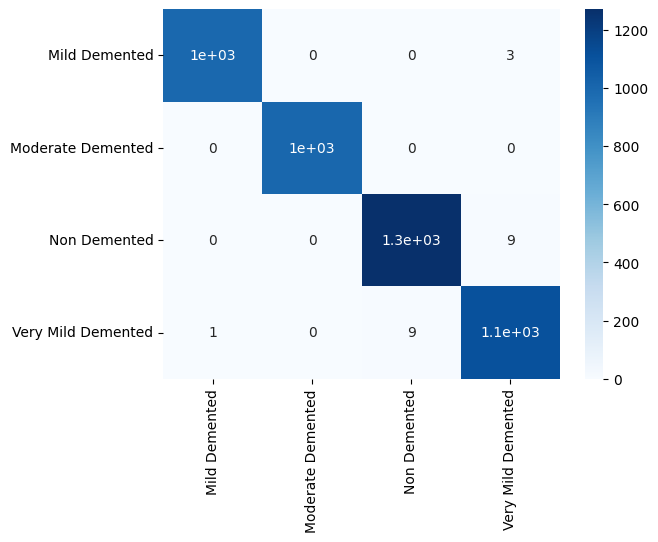

In [101]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# y_true is already integer labels, so no need to use argmax
cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=train_gen.class_indices.keys(),
            yticklabels=train_gen.class_indices.keys())
plt.show()


In [3]:
from tensorflow.keras.models import load_model

# Replace filenames with your actual model filenames
model_phase1_path = "phase1_model.keras"
model_phase2_path = "phase2_model.keras"
model_overall_path = "alzheimer_resnet50_model.keras"

# Load models
model_phase1 = load_model(model_phase1_path)
model_phase2 = load_model(model_phase2_path)
model_overall = load_model(model_overall_path)

print("✔ Phase 1 Model Loaded")
print("✔ Phase 2 Model Loaded")
print("✔ Overall Model Loaded")

✔ Phase 1 Model Loaded
✔ Phase 2 Model Loaded
✔ Overall Model Loaded


In [13]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


# ---------------------------------------------------
# 1. FIND LAST CONV LAYER AUTOMATICALLY
# ---------------------------------------------------
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in model.")



# ---------------------------------------------------
# 2. PREPROCESS INPUT IMAGE FOR YOUR MODEL
# ---------------------------------------------------
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, color_mode="grayscale", target_size=(224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)

    # your model expects 1-channel input but you concatenated it to 3 inside the model
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img



In [17]:
# ---------------------------------------------------
# 3. COMPUTE GRAD-CAM HEATMAP
# ---------------------------------------------------
def make_gradcam_heatmap(img_array, model_overall, last_conv_layer_name):

    # model: full model
    # img_array: shape (1,224,224,1)

    last_conv_layer = model_overall.get_layer(last_conv_layer_name)

    # Create a model mapping input → last conv outputs AND predictions
    grad_model = Model(
        [model_overall.inputs],
        [last_conv_layer.output, model_overall.output]
    )

    # Compute gradient of top predicted class wrt conv activation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        top_class = tf.argmax(predictions[0])
        loss = predictions[:, top_class]

    # Get gradients
    grads = tape.gradient(loss, conv_outputs)

    # Mean intensity of gradients for each filter
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()

    # Weight the conv outputs with channel importance
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-6

    return heatmap


# ---------------------------------------------------
# 4. SUPERIMPOSE HEATMAP ON ORIGINAL IMAGE
# ---------------------------------------------------
def overlay_heatmap(img_path, heatmap, intensity=0.45):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    heatmap = cv2.resize(heatmap, (224,224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * intensity + img
    superimposed_img = np.uint8(superimposed_img)

    return superimposed_img


In [104]:
example_image = test_gen.filepaths[10]
print("Image path:", example_image)

import os
print("Exists?", os.path.exists(example_image))


Image path: ./alz_split/test/Mild Demented/03415644-104e-49fc-b157-27f4c18658cd.jpg
Exists? True


/Users/muhammadabdullah/Desktop/DL Project/venv/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 1))
  warnings.warn(msg)


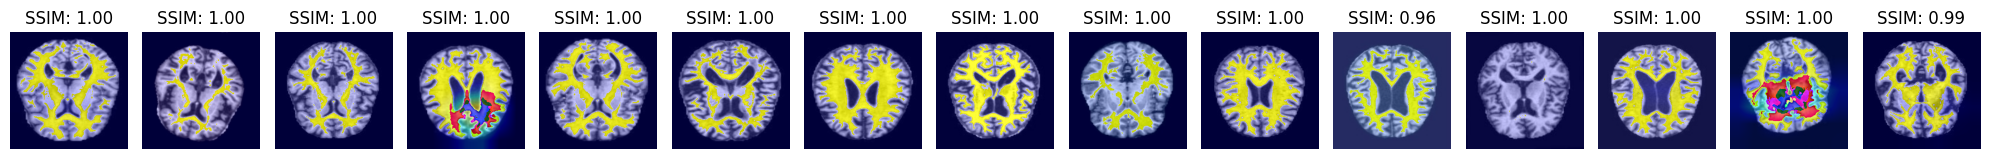

In [19]:
# ============================================================
# 1. Get 15 Random Image Paths from Dataset
# ============================================================
import glob
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def get_image_paths(root_folder, n=15):
    image_paths = glob.glob(root_folder + "/**/*.jpg", recursive=True)
    image_paths += glob.glob(root_folder + "/**/*.png", recursive=True)
    if len(image_paths) == 0:
        raise ValueError("No images found! Check dataset folder path.")
    return random.sample(image_paths, min(n, len(image_paths)))

# ============================================================
# 2. Compute Grad-CAM Heatmap Stability with Tiny Noise
# ============================================================
def compute_heatmap_stability(img_path, model_overall, num_runs=3, noise_level=1e-3):
    x = preprocess_image(img_path)
    orig_img = cv2.imread(img_path)
    h, w, _ = orig_img.shape

    heatmaps_runs = []
    for _ in range(num_runs):
        # Add tiny random noise
        x_perturbed = x + noise_level * np.random.randn(*x.shape)
        x_perturbed = np.clip(x_perturbed, 0, 1)

        last_conv = find_last_conv_layer(model_overall)
        heatmap = make_gradcam_heatmap(x_perturbed, model_overall, last_conv)

        heatmap_resized = cv2.resize(heatmap, (w, h))
        heatmap_resized = (heatmap_resized - heatmap_resized.min()) / \
                          (heatmap_resized.max() - heatmap_resized.min() + 1e-8)
        heatmaps_runs.append(heatmap_resized)

    ssim_values = [
        ssim(heatmaps_runs[i], heatmaps_runs[i+1], data_range=1.0)
        for i in range(len(heatmaps_runs)-1)
    ]

    return np.mean(ssim_values)

# ============================================================
# 3. Show Grad-CAM with Stability for 15 Images
# ============================================================
def show_gradcam_batch_with_stability(image_paths, model_overall):
    plt.figure(figsize=(20, 4))

    for i, path in enumerate(image_paths):
        x = preprocess_image(path)
        last_conv = find_last_conv_layer(model_overall)
        heatmap = make_gradcam_heatmap(x, model_overall, last_conv)
        result = overlay_heatmap(path, heatmap)

        stability = compute_heatmap_stability(path, model_overall, num_runs=15)

        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f"SSIM: {stability:.2f}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# ============================================================
# 4. RUN EVERYTHING
# ============================================================
root_folder = "./alz_split/test"
image_paths = get_image_paths(root_folder, n=15)
show_gradcam_batch_with_stability(image_paths, model_overall)

In [106]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2
import tensorflow as tf

def compute_heatmap_stability(img_path, model, num_runs=3, noise_level=1e-3):
    """
    Computes SSIM-based stability for Grad-CAM heatmaps over multiple runs
    with tiny input perturbations to simulate realistic stochasticity.

    noise_level: small value added to input to create minor variations.
    """
    # Preprocess image once
    x = preprocess_image(img_path)

    # Get original image size
    orig_img = cv2.imread(img_path)
    h, w, _ = orig_img.shape

    heatmaps_runs = []
    for _ in range(num_runs):
        # Add tiny random noise
        x_perturbed = x + noise_level * np.random.randn(*x.shape)
        x_perturbed = np.clip(x_perturbed, 0, 1)  # keep in valid range

        last_conv = find_last_conv_layer(model)
        heatmap = make_gradcam_heatmap(x_perturbed, model, last_conv)

        # Resize heatmap to match original image size
        heatmap_resized = cv2.resize(heatmap, (w, h))
        # Normalize to [0,1]
        heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min() + 1e-8)
        heatmaps_runs.append(heatmap_resized)

    # Compute SSIM between consecutive heatmaps
    ssim_values = [
        ssim(heatmaps_runs[i], heatmaps_runs[i+1], data_range=1.0)
        for i in range(len(heatmaps_runs)-1)
    ]

    heatmap_stability = np.mean(ssim_values)
    return heatmap_stability

# Example usage
img_path = "./alz_split/test/Mild Demented/03415644-104e-49fc-b157-27f4c18658cd.jpg"
stability = compute_heatmap_stability(img_path, model, num_runs=5)
print("Grad-CAM Heatmap Stability (SSIM):", stability)


Grad-CAM Heatmap Stability (SSIM): 0.9993944759691465


In [107]:
model.summary()

for i, layer in enumerate(model.layers):
    try:
        shape = layer.get_output_shape_at(0)
    except:
        shape = "N/A"
    print(i, layer.name, shape)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Concatenate)       │ 3)                │            │ input_layer_1[0]… │
│                     │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ concatenate_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 70,681,486 (269.63 MB)

 Trainable params: 23,542,788 (89.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,085,578 (179.62 MB)

0 input_layer_1 N/A
1 concatenate_1 N/A
2 conv1_pad N/A
3 conv1_conv N/A
4 conv1_bn N/A
5 conv1_relu N/A
6 pool1_pad N/A
7 pool1_pool N/A
8 conv2_block1_1_conv N/A
9 conv2_block1_1_bn N/A
10 conv2_block1_1_relu N/A
11 conv2_block1_2_conv N/A
12 conv2_block1_2_bn N/A
13 conv2_block1_2_relu N/A
14 conv2_block1_0_conv N/A
15 conv2_block1_3_conv N/A
16 conv2_block1_0_bn N/A
17 conv2_block1_3_bn N/A
18 conv2_block1_add N/A
19 conv2_block1_out N/A
20 conv2_block2_1_conv N/A
21 conv2_block2_1_bn N/A
22 conv2_block2_1_relu N/A
23 conv2_block2_2_conv N/A
24 conv2_block2_2_bn N/A
25 conv2_block2_2_relu N/A
26 conv2_block2_3_conv N/A
27 conv2_block2_3_bn N/A
28 conv2_block2_add N/A
29 conv2_block2_out N/A
30 conv2_block3_1_conv N/A
31 conv2_block3_1_bn N/A
32 conv2_block3_1_relu N/A
33 conv2_block3_2_conv N/A
34 conv2_block3_2_bn N/A
35 conv2_block3_2_relu N/A
36 conv2_block3_3_conv N/A
37 conv2_block3_3_bn N/A
38 conv2_block3_add N/A
39 conv2_block3_out N/A
40 conv3_block1_1_conv N/A
41 conv3_bl

In [20]:
# 16. Integrated Gradients Implementation
import tensorflow as tf
import numpy as np

def integrated_gradients(model_overall, x, baseline=None, steps=50):
    """
    Compute Integrated Gradients for a single input image x.
    x must be a tensor of shape (1, H, W, 3)
    """

    # 1. Create baseline (black image)
    if baseline is None:
        baseline = tf.zeros_like(x)

    # 2. Generate scaled images from baseline → input
    interpolated_images = [
        baseline + (step / steps) * (x - baseline)
        for step in range(steps + 1)
    ]
    interpolated_images = tf.concat(interpolated_images, axis=0)  # Shape: (steps+1, H, W, 3)

    # 3. Compute gradients for each interpolated image
    with tf.GradientTape() as tape:
        tape.watch(interpolated_images)
        preds = model_overall(interpolated_images)
        top_class = tf.argmax(preds[0])  # predicted class index
        target = preds[:, top_class]     # predictions for that class

    grads = tape.gradient(target, interpolated_images)  # Shape: (steps+1, H, W, 3)

    # 4. Average gradients across steps
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Integrated gradients = (input - baseline) * averaged gradient
    integrated_grads = (x - baseline) * avg_grads
    return integrated_grads.numpy()[0]


def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, color_mode="grayscale", target_size=(224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img


def visualize_integrated_gradients(img_path, attributions):
    """
    Displays the original image and its integrated gradients heatmap.
    """
    # Load original grayscale image (for display)
    orig = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    orig = cv2.resize(orig, (224, 224))

    # Normalize attributions for heatmap
    attr = attributions
    attr = np.mean(attr, axis=-1)  # convert 3-channel IG to 1-channel
    attr = (attr - attr.min()) / (attr.max() + 1e-8)

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(orig, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Integrated Gradients")
    plt.imshow(attr, cmap='inferno')
    plt.axis("off")

    plt.tight_layout()
    plt.show()



Processing Image 1: ./alz_split/test/Mild Demented/495211e4-3f0a-4937-9fab-326c98b972d6.jpg
SSIM (Original vs Slight Noise): 0.8577


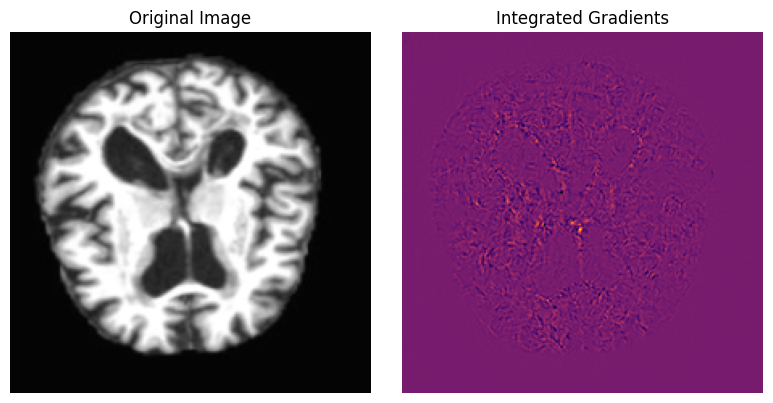


Processing Image 2: ./alz_split/test/Non Demented/252b03b0-fb14-4f93-958f-fe27655f40cf.jpg
SSIM (Original vs Slight Noise): 0.8136


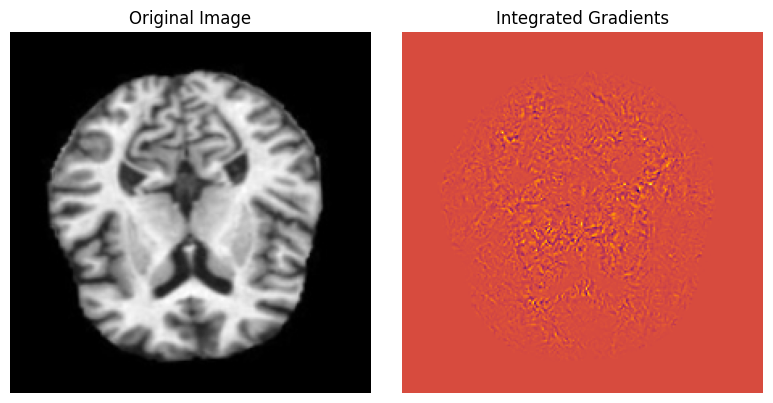


Processing Image 3: ./alz_split/test/Mild Demented/61be4917-c1fb-4fbd-bab5-3d1bd0f833cb.jpg
SSIM (Original vs Slight Noise): 0.8528


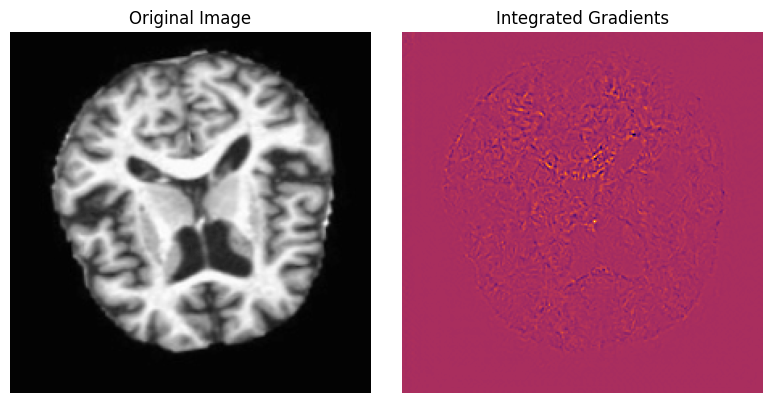


Processing Image 4: ./alz_split/test/Mild Demented/60685a42-586d-4209-8750-1d7b88bcf603.jpg
SSIM (Original vs Slight Noise): 0.8732


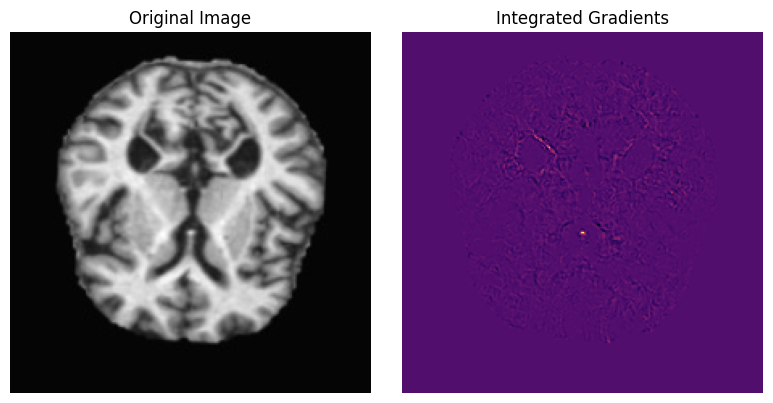


Processing Image 5: ./alz_split/test/Mild Demented/789d39c2-a83e-49b8-a354-64e057df3392.jpg
SSIM (Original vs Slight Noise): 0.8597


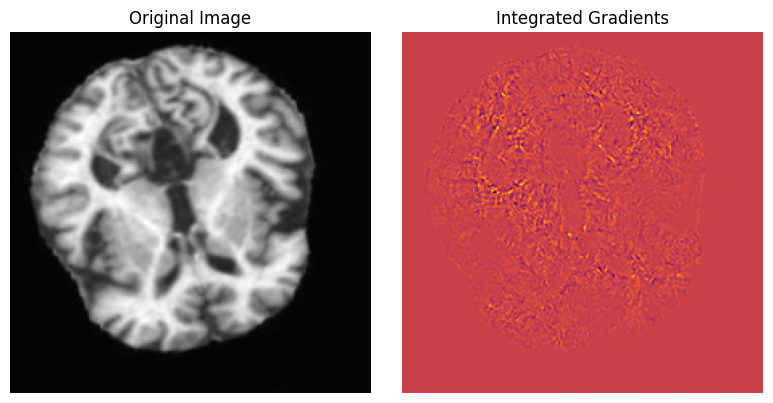


Processing Image 6: ./alz_split/test/Non Demented/c4f33662-a5c4-4cfc-aa27-182d89539299.jpg
SSIM (Original vs Slight Noise): 0.8660


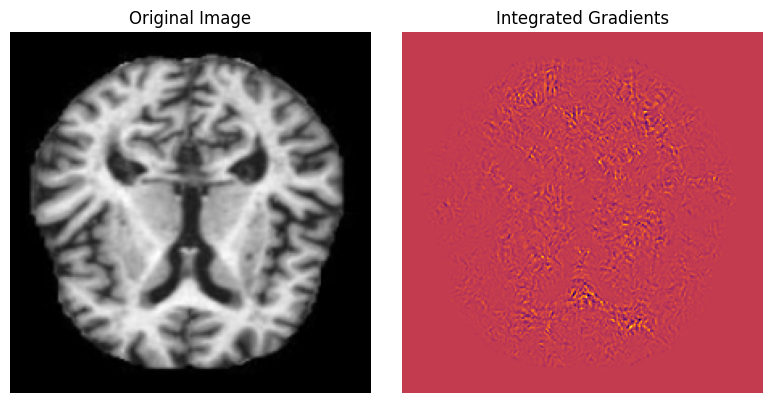


Processing Image 7: ./alz_split/test/Very Mild Demented/2b74bfad-5ea6-4a93-b1ae-2b25e0cbce09.jpg
SSIM (Original vs Slight Noise): 0.8610


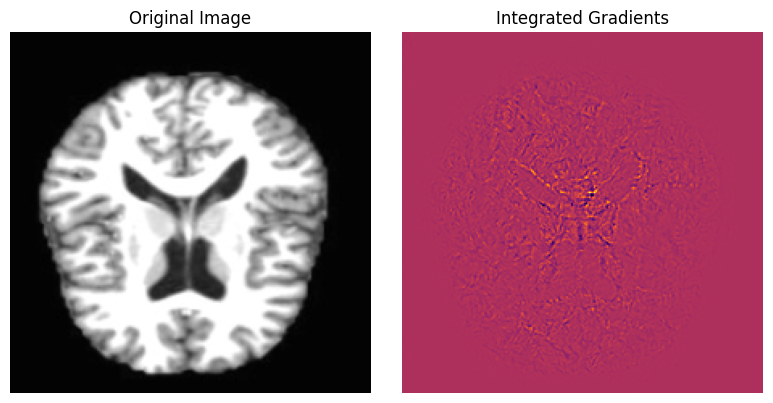


Processing Image 8: ./alz_split/test/Moderate Demented/f996a31c-c0b5-4867-91b6-0ed856c90401.jpg
SSIM (Original vs Slight Noise): 0.8400


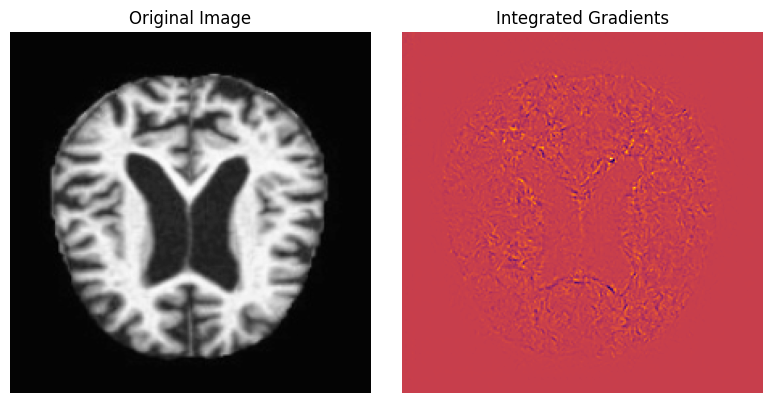


Processing Image 9: ./alz_split/test/Non Demented/c12f2b20-f479-4073-b998-d030bb98bf6a.jpg
SSIM (Original vs Slight Noise): 0.8164


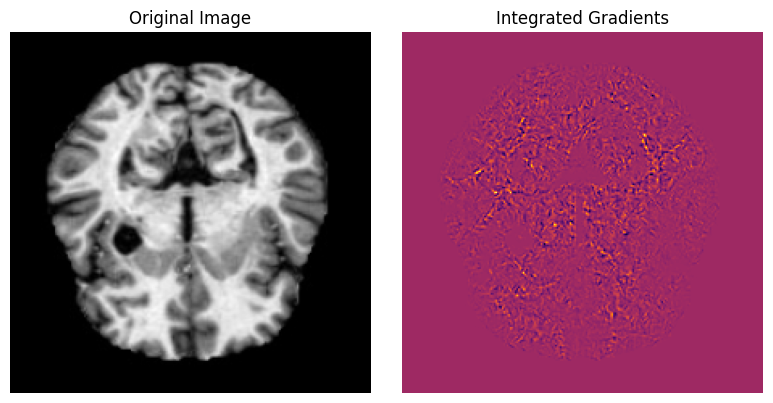


Processing Image 10: ./alz_split/test/Mild Demented/8f1ca4e7-c2dc-40b2-a43f-e510ac4238ad.jpg
SSIM (Original vs Slight Noise): 0.8877


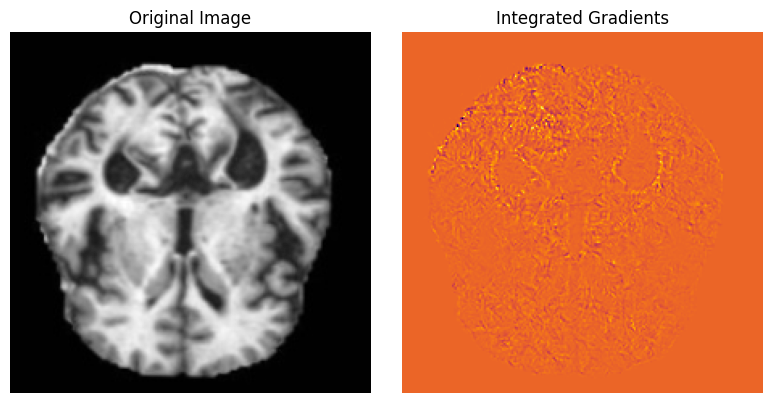


Processing Image 11: ./alz_split/test/Moderate Demented/aug_7622_90dcc2e8-a319-4154-8a3d-f3812893de17.jpg
SSIM (Original vs Slight Noise): 0.8271


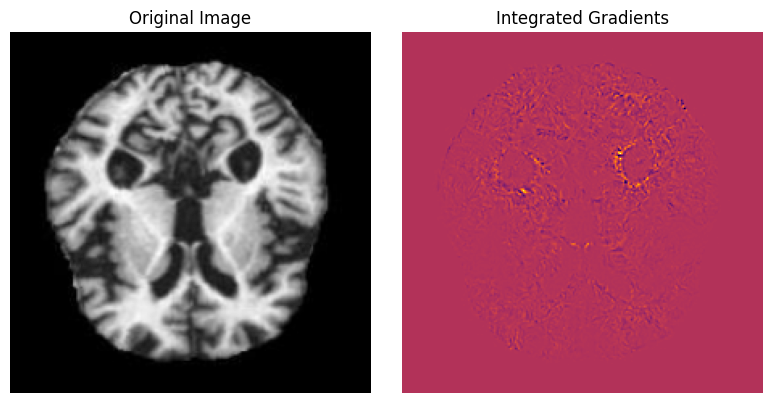


Processing Image 12: ./alz_split/test/Mild Demented/70b14881-d6db-42b1-95c6-215a2f69382d.jpg
SSIM (Original vs Slight Noise): 0.8590


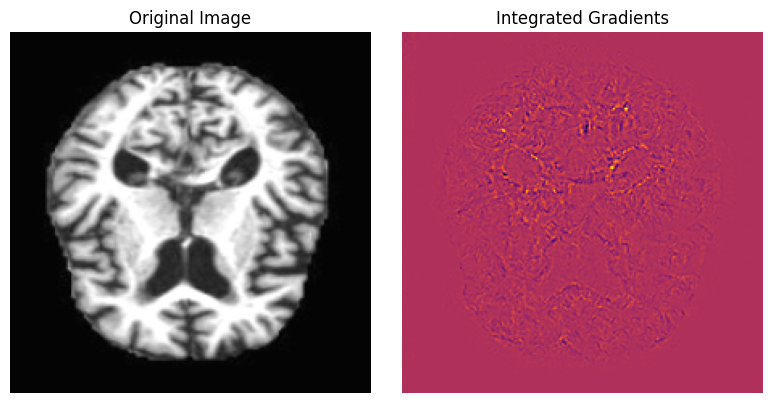


Processing Image 13: ./alz_split/test/Moderate Demented/aug_9107_e8fc6282-6040-4cc4-bb5d-bd513552c30c.jpg
SSIM (Original vs Slight Noise): 0.8873


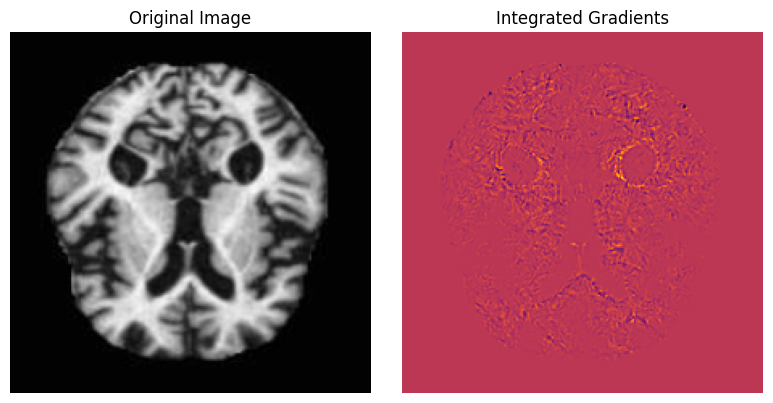


Processing Image 14: ./alz_split/test/Moderate Demented/047d8f63-59d4-4f1f-bec8-ed143cc6bcc0.jpg
SSIM (Original vs Slight Noise): 0.8166


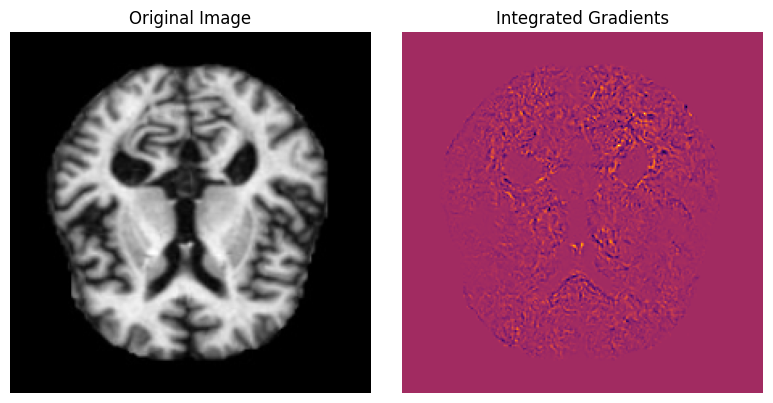


Processing Image 15: ./alz_split/test/Non Demented/nonDem133.jpg
SSIM (Original vs Slight Noise): 0.8140


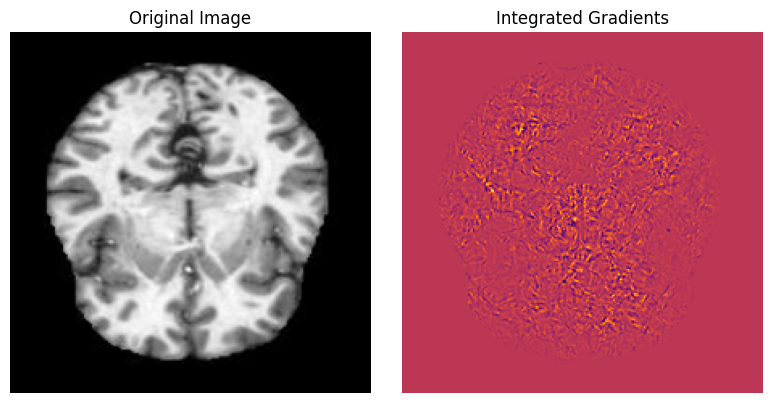

In [22]:
import glob
import random
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim   # ← SSIM imported

# -----------------------------------------------
# ADD SMALL NOISE FUNCTION
# -----------------------------------------------
def add_small_noise(img):
    noise = np.random.normal(0, 5, img.shape)  # very small noise
    noisy = img + noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy


# -----------------------------------------------
# 1. Fetch random image paths
# -----------------------------------------------
def get_image_paths(root_folder, n=15):
    image_paths = glob.glob(root_folder + "/**/*.jpg", recursive=True)
    image_paths += glob.glob(root_folder + "/**/*.png", recursive=True)

    if len(image_paths) == 0:
        raise ValueError("No images found! Check dataset folder path.")

    return random.sample(image_paths, min(n, len(image_paths)))


# -----------------------------------------------
# 2. Run Integrated Gradients on each image
# -----------------------------------------------
def run_integrated_gradients_on_images(image_paths, model_overall, steps=50):
    for i, path in enumerate(image_paths):
        print(f"\nProcessing Image {i+1}: {path}")

        # --- LOAD ORIGINAL IMAGE (GRAY) ---
        orig_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        orig_img_resized = cv2.resize(orig_img, (224, 224))

        # --- CREATE SLIGHTLY NOISY VERSION ---
        noisy_img = add_small_noise(orig_img_resized)

        # --- COMPUTE SSIM ---
        score, diff = ssim(orig_img_resized, noisy_img, full=True)
        print(f"SSIM (Original vs Slight Noise): {score:.4f}")

        # --- RUN IG (unchanged) ---
        x = preprocess_image(path)  
        attributions = integrated_gradients(model_overall, x, steps=steps)

        visualize_integrated_gradients(path, attributions)


# -----------------------------------------------
# 3. Execute
# -----------------------------------------------
root_folder = "./alz_split/test"
random_images = get_image_paths(root_folder, n=15)
run_integrated_gradients_on_images(random_images, model_overall)

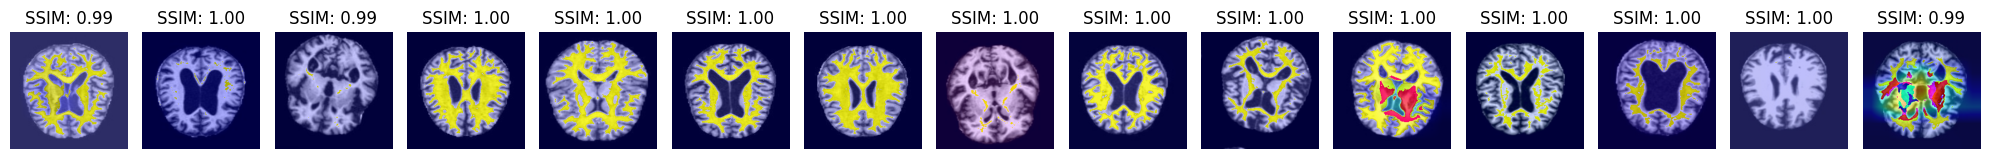

In [ ]:
# ALREADY DONE ABOVE!!!


# # ============================================================
# # 1. Get 15 Random Image Paths from Dataset
# # ============================================================
# import glob
# import random
# import numpy as np
# import cv2
# from skimage.metrics import structural_similarity as ssim
# import matplotlib.pyplot as plt

# def get_image_paths(root_folder, n=15):
#     # Search all jpg and png images in all subfolders
#     image_paths = glob.glob(root_folder + "/**/*.jpg", recursive=True)
#     image_paths += glob.glob(root_folder + "/**/*.png", recursive=True)

#     if len(image_paths) == 0:
#         raise ValueError("No images found! Check dataset folder path.")

#     # Return N random images
#     selected = random.sample(image_paths, min(n, len(image_paths)))
#     return selected

# # ============================================================
# # 2. Compute Grad-CAM Heatmap Stability
# # ============================================================
# def compute_heatmap_stability(img_path, model, num_runs=3, noise_level=1e-3):
#     x = preprocess_image(img_path)
#     orig_img = cv2.imread(img_path)
#     h, w, _ = orig_img.shape

#     heatmaps_runs = []
#     for _ in range(num_runs):
#         x_perturbed = x + noise_level * np.random.randn(*x.shape)
#         x_perturbed = np.clip(x_perturbed, 0, 1)

#         last_conv = find_last_conv_layer(model)
#         heatmap = make_gradcam_heatmap(x_perturbed, model, last_conv)

#         heatmap_resized = cv2.resize(heatmap, (w, h))
#         heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min() + 1e-8)
#         heatmaps_runs.append(heatmap_resized)

#     ssim_values = [
#         ssim(heatmaps_runs[i], heatmaps_runs[i+1], data_range=1.0)
#         for i in range(len(heatmaps_runs)-1)
#     ]

#     heatmap_stability = np.mean(ssim_values)
#     return heatmap_stability

# # ============================================================
# # 3. Show Grad-CAM with Stability for 5 Images
# # ============================================================
# def show_gradcam_batch_with_stability(image_paths, model):
#     plt.figure(figsize=(20, 4))

#     for i, path in enumerate(image_paths):
#         x = preprocess_image(path)
#         last_conv = find_last_conv_layer(model)
#         heatmap = make_gradcam_heatmap(x, model, last_conv)
#         result = overlay_heatmap(path, heatmap)

#         stability = compute_heatmap_stability(path, model, num_runs=5)

#         plt.subplot(1, len(image_paths), i + 1)
#         plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
#         plt.title(f"SSIM: {stability:.2f}")
#         plt.axis("off")

#     plt.tight_layout()
#     plt.show()

# # ============================================================
# # 4. RUN EVERYTHING
# # ============================================================
# root_folder = "./alz_split/test"
# image_paths = get_image_paths(root_folder, n=15)
# show_gradcam_batch_with_stability(image_paths, model)


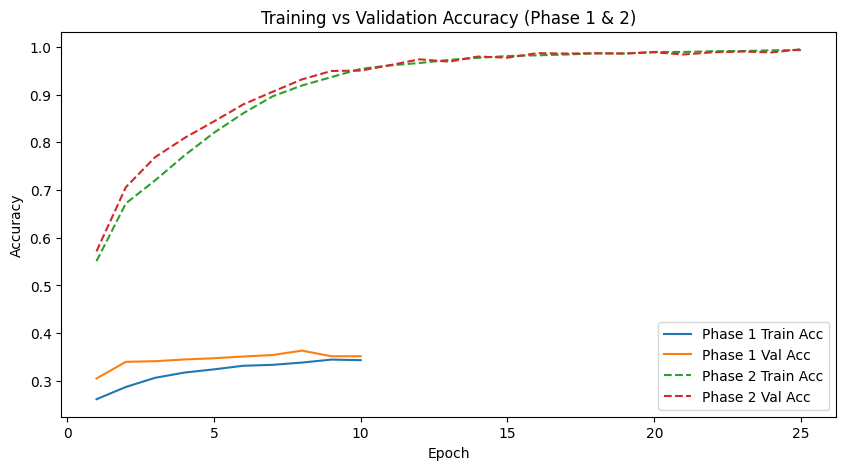

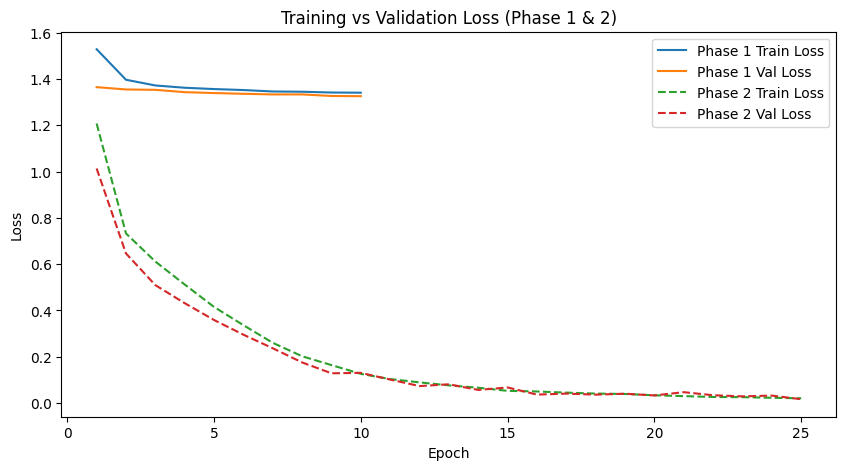

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs for phase 1 and phase 2
phase1 = pd.read_csv("./phase1_log.csv")
phase2 = pd.read_csv("./phase2_log.csv")

# Add epoch numbers if not included
phase1['epoch'] = range(1, len(phase1)+1)
phase2['epoch'] = range(1, len(phase2)+1)

# -----------------------
# Accuracy Plot
# -----------------------
plt.figure(figsize=(10,5))
plt.plot(phase1['epoch'], phase1['accuracy'], label='Phase 1 Train Acc')
plt.plot(phase1['epoch'], phase1['val_accuracy'], label='Phase 1 Val Acc')
plt.plot(phase2['epoch'], phase2['accuracy'], '--', label='Phase 2 Train Acc')
plt.plot(phase2['epoch'], phase2['val_accuracy'], '--', label='Phase 2 Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Phase 1 & 2)')
plt.legend()
plt.show()

# -----------------------
# Loss Plot
# -----------------------
plt.figure(figsize=(10,5))
plt.plot(phase1['epoch'], phase1['loss'], label='Phase 1 Train Loss')
plt.plot(phase1['epoch'], phase1['val_loss'], label='Phase 1 Val Loss')
plt.plot(phase2['epoch'], phase2['loss'], '--', label='Phase 2 Train Loss')
plt.plot(phase2['epoch'], phase2['val_loss'], '--', label='Phase 2 Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Phase 1 & 2)')
plt.legend()
plt.show()

In [113]:
# 18. Save Model

model.save("alzheimer_resnet50_model.keras")